In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
#Importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/gdrive/MyDrive/HR_comma_sep.csv')

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
#Categorizing satisfaction and evaluation levels into bins
bins=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

df['satisfaction_binned'] = pd.cut(df['satisfaction_level'], bins=bins)
df['evaluation_binned'] = pd.cut(df['last_evaluation'], bins=bins)

In [8]:
#Counting the number of values in each bin
satisfaction_count=df.satisfaction_binned.value_counts().sort_index()
evaluation_count=df.evaluation_binned.value_counts().sort_index()

[Text(0, 0, '(0.0, 0.1]'),
 Text(0, 0, '(0.1, 0.2]'),
 Text(0, 0, '(0.2, 0.3]'),
 Text(0, 0, '(0.3, 0.4]'),
 Text(0, 0, '(0.4, 0.5]'),
 Text(0, 0, '(0.5, 0.6]'),
 Text(0, 0, '(0.6, 0.7]'),
 Text(0, 0, '(0.7, 0.8]'),
 Text(0, 0, '(0.8, 0.9]'),
 Text(0, 0, '(0.9, 1.0]')]

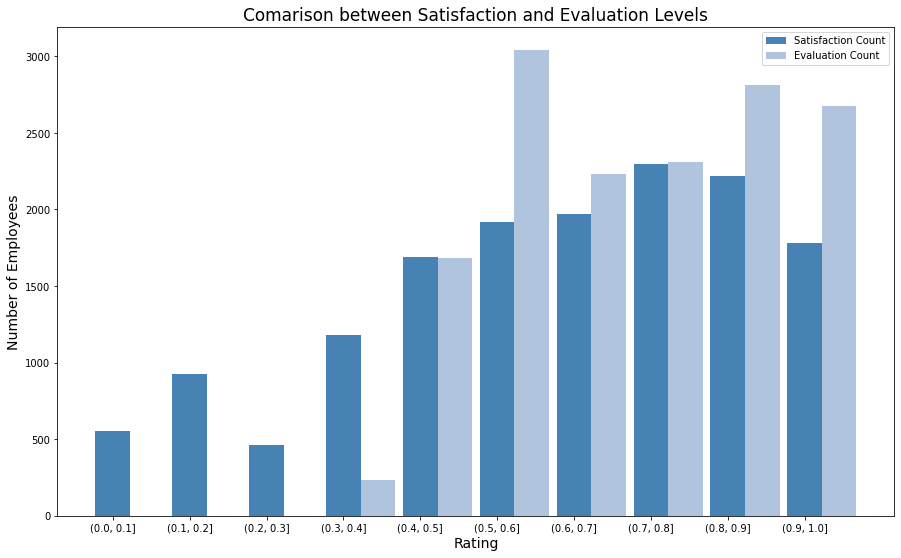

In [9]:
#Creating and formatting a grouped bar chart with the necessary indicators to compare satisfaction and evaluation levels
fig, ax=plt.subplots(figsize=(15,9))
bar_width=0.45
x=np.arange(len(satisfaction_count))
counts=['Satisfaction Count','Evaluation Count']
new_bins = ["(0.0, 0.1]", "(0.1, 0.2]", "(0.2, 0.3]", "(0.3, 0.4]", "(0.4, 0.5]", "(0.5, 0.6]", "(0.6, 0.7]", "(0.7, 0.8]", "(0.8, 0.9]", "(0.9, 1.0]"]
plt.bar(x,satisfaction_count,width=bar_width,color='SteelBlue')
plt.bar(x+bar_width,evaluation_count,width=bar_width,color='LightSteelBlue')
ax.legend(counts)
plt.title('Comarison between Satisfaction and Evaluation Levels',size=17)
plt.xlabel('Rating',size=14)
plt.ylabel('Number of Employees',size=14)
ax.set_xticks(x)
ax.set_xticklabels(new_bins)

In [10]:
#Calculating the average yearly hours worked per department
df['average_yearly_hours']=df['average_montly_hours']*12/df['time_spend_company']
avg_hrs_dept=round(df.groupby('Department').average_yearly_hours.mean().sort_values(),0)
print('Average yearly hours per department: ',avg_hrs_dept)

Average yearly hours per department:  Department
management     712.0
accounting     762.0
marketing      762.0
sales          774.0
product_mng    777.0
hr             780.0
IT             787.0
technical      790.0
RandD          791.0
support        794.0
Name: average_yearly_hours, dtype: float64


In [11]:
#Calculating the number of employees stayed in each department
no_left_dept=df.loc[df['left']==1.]
no_left_dept=no_left_dept.groupby('Department').left.value_counts()
#Calculating the number of leavers per department
stay_dept=df.loc[df['left']==0.]
stay_dept=stay_dept.groupby('Department').left.value_counts()

[Text(0, 0, 'IT'),
 Text(0, 0, 'RandD'),
 Text(0, 0, 'Accounting'),
 Text(0, 0, 'HR'),
 Text(0, 0, 'Management'),
 Text(0, 0, 'Marketing'),
 Text(0, 0, 'Product_mng'),
 Text(0, 0, 'Sales'),
 Text(0, 0, 'Support'),
 Text(0, 0, 'Technical')]

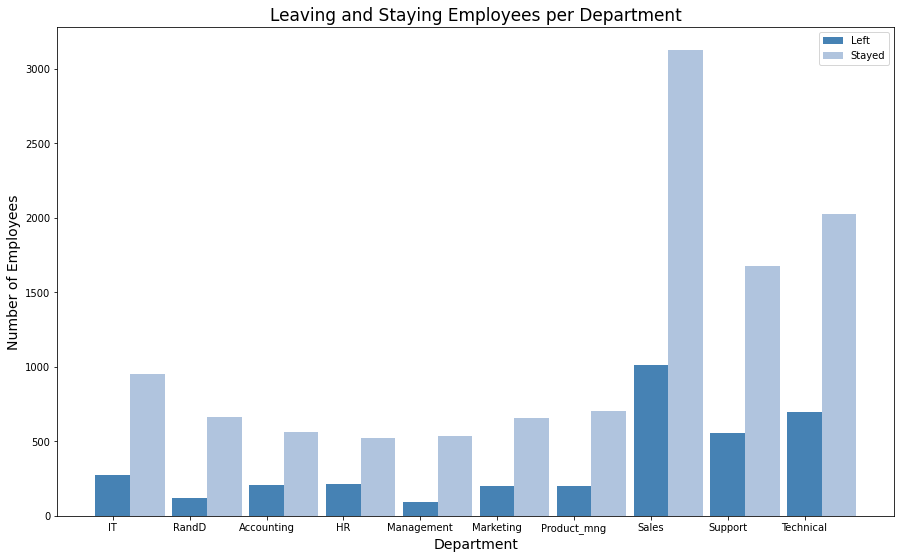

In [12]:
#Creating and formatting a grouped bar chart with the necessary indicators to compare the number of staying and leaving employees in each department
fig, ax=plt.subplots(figsize=(15,9))
bar_width=0.45
labels=['IT','RandD','Accounting','HR','Management','Marketing','Product_mng','Sales','Support','Technical']
legends=['Left','Stayed']
x=np.arange(len(no_left_dept))
plt.bar(x,no_left_dept,width=bar_width,color='SteelBlue')
plt.bar(x+bar_width,stay_dept,width=bar_width,color='LightSteelBlue')
plt.legend(legends)
plt.title('Leaving and Staying Employees per Department',size=17)
plt.xlabel('Department',size=14)
plt.ylabel('Number of Employees',size=14)
ax.set_xticks(x)
ax.set_xticklabels(labels)

In [13]:
#Finding the total and percentage employees stayed and left per salary category
left_prct=pd.DataFrame()
left_prct['total']=df.groupby('salary').left.value_counts()
left_prct['left']=round(df.groupby('salary').left.value_counts(True),2)
left_prct['left'] = left_prct['left'].astype(float).map("{:.0%}".format)
left_prct=left_prct.rename(columns={'left':'Percentage'})
left_prct

total Percentage
salary left                  
high   0      1155        93%
       1        82         7%
low    0      5144        70%
       1      2172        30%
medium 0      5129        80%
       1      1317        20%

In [14]:
#Finding the number of staying and leaving employees who were/were not promoted in the last 5 years
#Promotion could be the main reason for leaving the company because most leavers were not promoted
left_promo=pd.DataFrame(df.groupby('left').promotion_last_5years.value_counts())
left_promo

promotion_last_5years
left promotion_last_5years                       
0    0                                      11128
     1                                        300
1    0                                       3552
     1                                         19

In [31]:
#Getting the number of leavers who had low salary and were not promoted in the last 5 years 
print('Number of leavers who had low salary and were not promoted :',df['left'].loc[(df['salary']=='low')&(df['left']==1)&(df['promotion_last_5years']==0)].count())

Number of leavers who had low salary and were not promoted : 2158


In [32]:
#Getting the number of leavers who had medium salary and were not promoted in the last 5 years 
print('Number of leavers who had medium salary and were not promoted :',df['left'].loc[(df['salary']=='medium')&(df['left']==1)&(df['promotion_last_5years']==0)].count())

Number of leavers who had medium salary and were not promoted : 1312


In [17]:
#Specifying the independent and dependent variables
predictor=df.loc[:,'promotion_last_5years']
predicted=df.loc[:,'left']

In [18]:
#Subsetting the dataset to training and testing sets
from sklearn.model_selection import train_test_split
predictor_train, predictor_test, predicted_train, predicted_test = train_test_split(predictor, predicted, test_size = 0.20)


In [19]:
#Reshaping to 2-D array
predictor_train=predictor_train.values.reshape(-1, 1)
predicted_train=predicted_train.values.reshape(-1, 1)
predictor_test=predictor_test.values.reshape(-1, 1)

In [20]:
#Creating an instance of the logistic regression model and fitting it to the training data
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(predictor_train, predicted_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
#Predicting the dependent variable 
y_pred = classifier.predict(predictor_test)

In [22]:
#Creating a confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(predicted_test, y_pred)
cnf_matrix

array([[2301,    0],
       [ 699,    0]])

Text(0.5, 257.44, 'Predicted label')

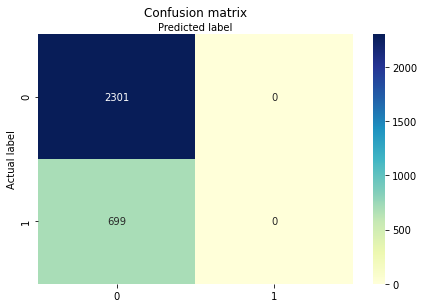

In [23]:
#Plotting the confusion matrix as a heatmap
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [24]:
#Getting the accuracy, precision, and recall of the model
print("Accuracy:",metrics.accuracy_score(predicted_test, y_pred))
print("Precision:",metrics.precision_score(predicted_test, y_pred))
print("Recall:",metrics.recall_score(predicted_test, y_pred))

Accuracy: 0.767
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
